In [13]:
#import libraries

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [5]:
# read_csv function

folder_name = 'Aleg'
dir = r'C:\Users\mcaba\OneDrive\Escritorio\Data Science\Company test\Company-test\{}'.format(folder_name)

def read_csv_fun(folder_name,file_name, path):
    path = dir
    os.chdir(path)
    df = pd.read_csv('{}.csv'.format(file_name), sep=',', low_memory=False, on_bad_lines='skip')
    return df


In [ ]:
df_ac = read_csv_fun('Aleg','analisis_cohortes', dir)
print(df_ac.head(5))

             cohort_month                   month  total_companies  \
0  2019-01-01 00:00:00-05  2019-01-01 00:00:00-05              254   
1  2019-01-01 00:00:00-05  2019-02-01 00:00:00-05              254   
2  2019-01-01 00:00:00-05  2019-03-01 00:00:00-05              254   
3  2019-01-01 00:00:00-05  2019-04-01 00:00:00-05              254   
4  2019-01-01 00:00:00-05  2019-05-01 00:00:00-05              254   

   retained_companies  retention_rate  
0                 254      100.000000  
1                 253       99.606299  
2                 252       99.212598  
3                 245       96.456693  
4                 240       94.488189  


In [9]:
print(df_ac.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cohort_month        820 non-null    object 
 1   month               820 non-null    object 
 2   total_companies     820 non-null    int64  
 3   retained_companies  820 non-null    int64  
 4   retention_rate      820 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 32.2+ KB
None


In [11]:
display(
    df_ac.value_counts("cohort_month")
)

cohort_month
2019-01-01 00:00:00-05    40
2019-02-01 00:00:00-05    39
2019-03-01 00:00:00-05    38
2019-04-01 00:00:00-05    37
2019-05-01 00:00:00-05    36
2019-06-01 00:00:00-05    35
2019-07-01 00:00:00-05    34
2019-08-01 00:00:00-05    33
2019-09-01 00:00:00-05    32
2019-10-01 00:00:00-05    31
2019-11-01 00:00:00-05    30
2019-12-01 00:00:00-05    29
2020-01-01 00:00:00-05    28
2020-02-01 00:00:00-05    27
2020-03-01 00:00:00-05    26
2020-04-01 00:00:00-05    25
2020-05-01 00:00:00-05    24
2020-06-01 00:00:00-05    23
2020-07-01 00:00:00-05    22
2020-08-01 00:00:00-05    21
2020-09-01 00:00:00-05    20
2020-10-01 00:00:00-05    19
2020-11-01 00:00:00-05    18
2020-12-01 00:00:00-05    17
2021-01-01 00:00:00-05    16
2021-02-01 00:00:00-05    15
2021-03-01 00:00:00-05    14
2021-04-01 00:00:00-05    13
2021-05-01 00:00:00-05    12
2021-06-01 00:00:00-05    11
2021-07-01 00:00:00-05    10
2021-08-01 00:00:00-05     9
2021-09-01 00:00:00-05     8
2021-10-01 00:00:00-05     7
2

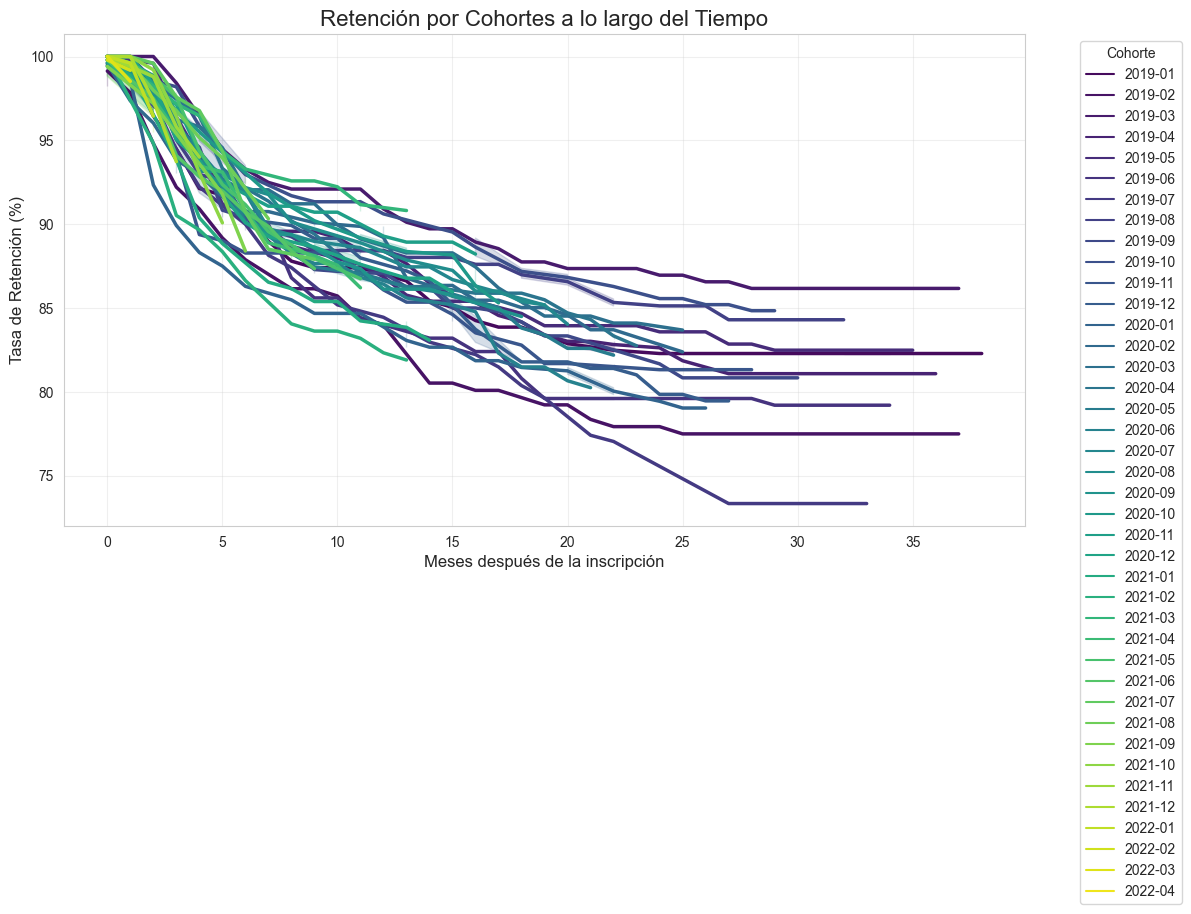

In [18]:
# 1. Convertir las columnas de fecha a datetime
df_ac['cohort_month'] = pd.to_datetime(df_ac['cohort_month'])
df_ac['month'] = pd.to_datetime(df_ac['month'])

# 2. Calcular la diferencia en meses entre cada mes y su cohorte
df_ac['meses_despues'] = ((df_ac['month'] - df_ac['cohort_month']) 
                         / np.timedelta64(1, 'M')).astype(int)

# 3. Crear una columna de identificación del cohorte (opcional, para mejor visualización)
df_ac['cohort_id'] = df_ac['cohort_month'].dt.strftime('%Y-%m')

# 4. Filtrar datos si es necesario (puedes ajustar esto)
df_plot = df_ac[df_ac['meses_despues'] <= 48]  # Mostrar hasta 12 meses

# 5. Crear el gráfico de líneas
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_plot, 
             x='meses_despues', 
             y='retention_rate', 
             hue='cohort_id',
             palette='viridis',
             linewidth=2.5)

# 6. Personalizar el gráfico
plt.title('Retención por Cohortes a lo largo del Tiempo', fontsize=16)
plt.xlabel('Meses después de la inscripción', fontsize=12)
plt.ylabel('Tasa de Retención (%)', fontsize=12)
plt.legend(title='Cohorte', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.show()

C:\Users\mcaba\AppData\Local\Temp\ipykernel_36520\2637966585.py:12: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_ac['cohort_quarter'] = df_ac['cohort_month'].dt.to_period('Q').astype(str)


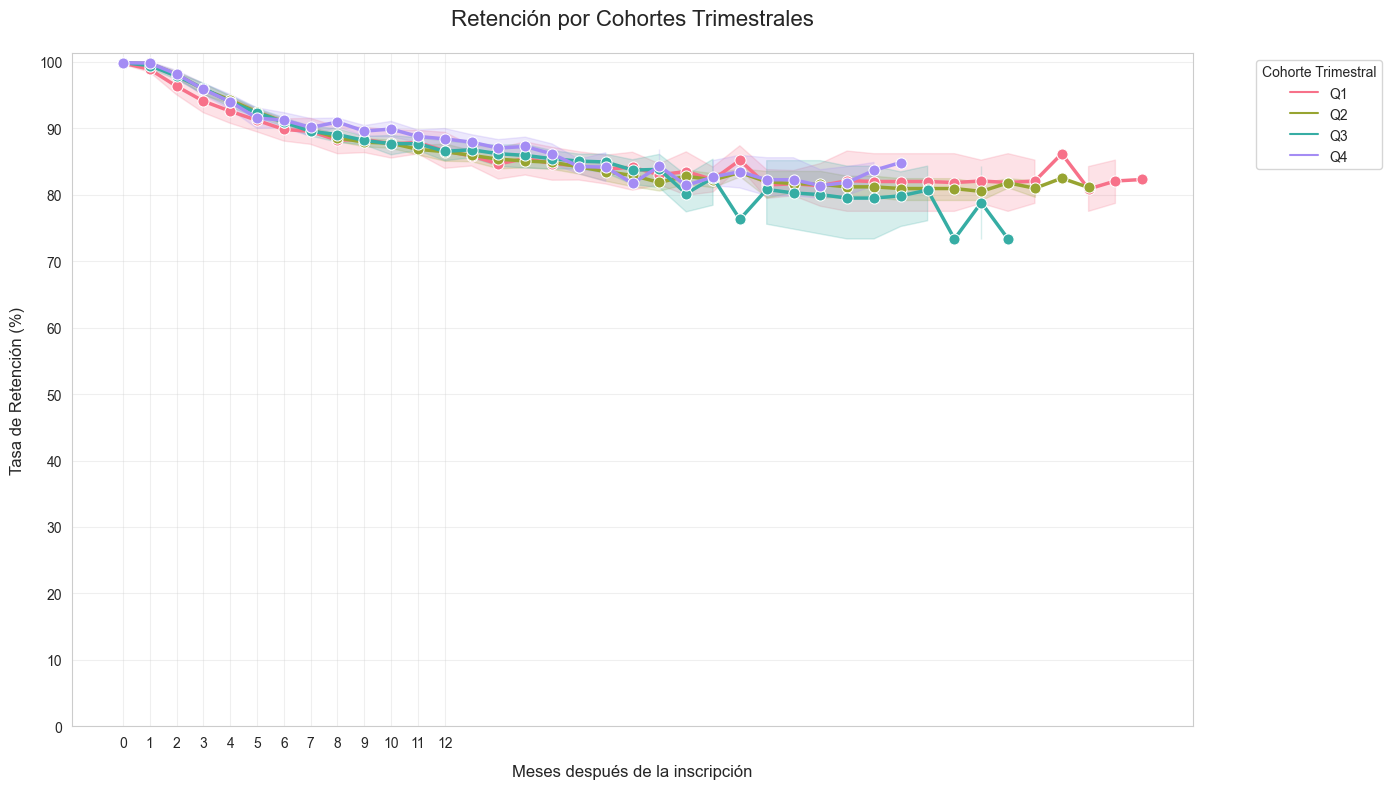

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Convertir fechas y calcular meses relativos (como antes)
df_ac['cohort_month'] = pd.to_datetime(df_ac['cohort_month'])
df_ac['month'] = pd.to_datetime(df_ac['month'])
df_ac['meses_despues'] = ((df_ac['month'] - df_ac['cohort_month']) / np.timedelta64(1, 'M')).astype(int)

# 2. Crear identificador de cohorte por trimestre
df_ac['cohort_quarter'] = df_ac['cohort_month'].dt.to_period('Q').astype(str)
df_ac['cohort_quarter'] = 'Q' + df_ac['cohort_quarter'].str.split('Q').str[1]

# 3. Filtrar y ordenar
df_plot = df_ac[df_ac['meses_despues'] <= 48]  # Mostrar hasta 12 meses
df_plot = df_plot.sort_values(['cohort_month', 'meses_despues'])

# 4. Crear el gráfico mejorado
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Usar palette de colores más distintiva
palette = sns.color_palette("husl", n_colors=len(df_plot['cohort_quarter'].unique()))

ax = sns.lineplot(data=df_plot, 
                 x='meses_despues', 
                 y='retention_rate', 
                 hue='cohort_quarter',
                 palette=palette,
                 linewidth=2.5,
                 marker='o',  # Añadir marcadores
                 markersize=8)

# Personalización avanzada
plt.title('Retención por Cohortes Trimestrales', fontsize=16, pad=20)
plt.xlabel('Meses después de la inscripción', fontsize=12, labelpad=10)
plt.ylabel('Tasa de Retención (%)', fontsize=12, labelpad=10)
plt.xticks(range(0, 13))  # Mostrar todos los meses hasta 12
plt.yticks(range(0, 101, 10))  # Escala de 0-100% en pasos de 10%

# Mejorar la leyenda
plt.legend(title='Cohorte Trimestral', 
           bbox_to_anchor=(1.05, 1), 
           loc='upper left',
           frameon=True)

# Añadir grid y ajustar layout
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.show()

### ML

import pandas as pd
from sklearn.linear_model import LinearRegression

# Datos históricos
data = {
    'clientes': [1000, 1200, 1500, 1800],
    'churn_rate': [0.10, 0.09, 0.08, 0.07],
    'mrr': [10000, 12000, 15000, 18000]
}
df = pd.DataFrame(data)

# Modelo de regresión lineal
X = df[['clientes', 'churn_rate']]
y = df['mrr']
model = LinearRegression()
model.fit(X, y)

# Predicción para el próximo mes
nuevos_clientes = 2000
nuevo_churn = 0.06
prediccion_mrr = model.predict([[nuevos_clientes, nuevo_churn]])
print(f"MRR predicho: {prediccion_mrr[0]:.2f}")